In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
import math
import numpy as np
import pylab as plt
from scipy.special import gamma
import xraylib

In [19]:
def func(l):
    """
    This function calculate an intrinsic part of the spectrum.
    
    :param l: wavelength
    :type l: int, float
    :returns: an array of intensity values
    :rtype: float
    """
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    v=40.0 # напряжение на в трубке
    lmin=12.4/1.6/v #минимальная длинна волны
    res = b*z*v*v/l/l*(1/lmin-1/l)
    return res

In [20]:
v = 40 # напряжение на в трубке
lmin=12.4/1.6/v #минимальная длинна волны
l=np.arange(lmin, 2, 0.01) # массив длинн волн

In [21]:
def lor(l, l0): # рассчет спектральной лоренцовской линии
    """
    This function calculate a characteristic line of a Lorentz's peak. 
    
    :param l: wavelength
    :param l0: starting wavelength
    :returns: an array of characteristic line
    :rtype: float
    """
    v = 20 # напряжение на в трубке
    I = 10 # сила тока на аноде
    vk = 7 # ионизтрующий потенциал К-оболочки
    i = I*sqrt((v-vk)*(v-vk)*(v-vk)) # интенсивность характерестического излучения
    g = 6.62*3/1.6/1000 # полуширина лоренцовской линии
    res2 = i*g/2/3.14/((l-l0)*(l-l0) + (g/2)*(g/2)) # лоренцова линия
    return res2

In [22]:
def det(l): #детектирование
    """
    This function calculate the intensity of the radiation given absorption 1mm aluminum.
    
    :param l: wavelength
    :returns: 
    :rtype: 
    """
    return l/2

In [23]:
def absorb(intensity, l, material, s): #поглощение
    """
    This function calculate the intensity of the radiation given absorption 0.5mm cuprum.
    
    :param l: wavelength
    :param intensity: intensity without absorption
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    :rtype: float
    """
    r = 5.32873
    c = 3.0
    h = 6.62
    e = 12.4/l
    A=[]
    for ae in e:
        A.append(exp(-xraylib.CS_Total_CP(material, ae)*r*s))
    return intensity*A

In [24]:
intensity = (func(l)+lor(l, 6.62*3/1.6/7.882)+lor(l, 6.62*3/1.6/8.027)+lor(l, 6.62*3/1.6/8.047)+lor(l, 6.62*3/1.6/8.905))*det(l) # полный спектр

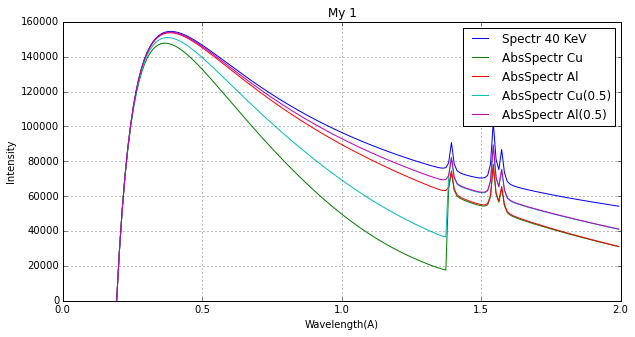

In [25]:
plt.figure(figsize=(10,5))
plt.plot(l,intensity, label='Spectr 40 KeV')
plt.plot(l, absorb(intensity, l, "Cu", 0.001), label='AbsSpectr Cu')
plt.plot(l, absorb(intensity, l, "Al", 0.001), label='AbsSpectr Al')
plt.plot(l, absorb(intensity, l, "Cu", 0.0005), label='AbsSpectr Cu(0.5)')
plt.plot(l, absorb(intensity, l, "Al", 0.0005), label='AbsSpectr Al(0.5)')
plt.grid(True)
plt.legend(loc=0)
plt.title('My 1')
plt.xlabel('Wavelength(A)')
plt.ylabel('Intensity')

In [15]:
def mu(l): #коэффициент поглощения
    c = 3.0
    h = 6.62
    e = 12.4/l 
    A=[]
    for ae in e:
        A.append(xraylib.CS_Total_CP("H2O", ae))
    return A

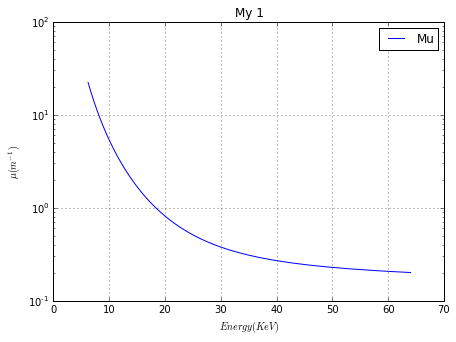

In [16]:
c = 3.0 #построение зависимости массового коэффициента поглащения от энергии  
h = 6.62
e = 12.4/l
plt.figure(figsize=(7,5))
plt.semilogy(e, mu(l), label='Mu')
plt.grid(True)
plt.legend(loc=0)
plt.title('My 1')
plt.xlabel('$Energy(KeV)$')
plt.ylabel('$\mu(m^{-1})$')

In [56]:
absorb?